In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("Breast_Cancer_data.csv")

#**EDA and PreProcessing**

In [3]:
df.head()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               213 non-null    int64 
 1   Year              213 non-null    object
 2   Age               213 non-null    int64 
 3   Menopause         213 non-null    int64 
 4   Tumor Size (cm)   213 non-null    object
 5   Inv-Nodes         213 non-null    object
 6   Breast            213 non-null    object
 7   Metastasis        213 non-null    object
 8   Breast Quadrant   213 non-null    object
 9   History           213 non-null    object
 10  Diagnosis Result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [5]:
df.sort_values(by='Year')

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
40,41,#,34,1,#,#,#,#,#,#,Malignant
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
74,75,2019,18,1,3,0,Right,0,Lower outer,0,Benign
73,74,2019,31,1,4,0,Left,0,Lower outer,0,Benign
72,73,2019,39,1,2,0,Right,0,Upper outer,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...
132,133,2020,38,1,7,1,Right,0,Lower inner,1,Malignant
131,132,2020,68,0,7,1,Left,1,Lower inner,1,Malignant
130,131,2020,33,1,4,0,Left,0,Upper inner,0,Benign
156,157,2020,53,0,5,0,Right,0,Upper inner,1,Malignant


In [6]:
to_drop = ["S/N"]
df.drop(to_drop, inplace = True, axis=1)

In [7]:
df.sample(10)

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
73,2019,31,1,4,0,Left,0,Lower outer,0,Benign
12,2019,50,0,5,1,Right,1,Upper outer,0,Malignant
9,2019,42,1,2,0,Right,0,Lower outer,1,Benign
97,2019,65,0,6,1,Right,1,Upper outer,1,Malignant
64,2019,41,1,5,0,Left,0,Lower inner,0,Malignant
110,2020,18,1,5,0,Left,0,Lower inner,0,Benign
5,2019,50,0,5,1,Right,1,Lower outer,0,Malignant
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign
202,2020,38,1,3,0,Right,0,Lower outer,0,Benign
116,2020,51,0,7,1,Left,1,Upper inner,1,Malignant


In [8]:
df.isna().sum()

Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [9]:
def hash_count():
    hash_counts = {}
    for column in df.columns:
        hash_count = df[column].astype(str).str.count('#').sum()
        hash_counts[column] = hash_count
    return hash_counts

In [10]:
hash_count()

{'Year': 1,
 'Age': 0,
 'Menopause': 0,
 'Tumor Size (cm)': 1,
 'Inv-Nodes': 1,
 'Breast': 6,
 'Metastasis': 1,
 'Breast Quadrant': 2,
 'History': 2,
 'Diagnosis Result': 0}

In [11]:
df.duplicated().sum()

0

In [12]:
df.replace("#", np.nan, inplace=True)
hash_count()

{'Year': 0,
 'Age': 0,
 'Menopause': 0,
 'Tumor Size (cm)': 0,
 'Inv-Nodes': 0,
 'Breast': 0,
 'Metastasis': 0,
 'Breast Quadrant': 0,
 'History': 0,
 'Diagnosis Result': 0}

In [13]:
df.tail(5)

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
208,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign
212,2020,50,0,4,0,Right,0,Lower outer,1,Benign


In [14]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Tumor Size (cm)'] = pd.to_numeric(df['Tumor Size (cm)'], errors='coerce')
df['Inv-Nodes'] = pd.to_numeric(df['Inv-Nodes'], errors='coerce')
df['Metastasis'] = pd.to_numeric(df['Metastasis'], errors='coerce')
df['Tumor Size (cm)'].fillna(df['Tumor Size (cm)'].median(), inplace=True)
df['Year'].interpolate(method='linear', inplace=True)


df.isnull().sum()

Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           1
Breast              6
Metastasis          1
Breast Quadrant     2
History             2
Diagnosis Result    0
dtype: int64

In [15]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Year: [2019. 2020.]
Age: [40 39 45 26 21 50 58 35 42 41 43 30 33 38 60 47 57 34 31 36 56 48 61 20
 37 27 25 17 23 59 67 46 24 49 53 28 68 64 18 14 15 54 71 55 22 65 19 52
 51 44 63 29 32 62 69 13 16 77]
Menopause: [1 0]
Tumor Size (cm): [ 2.  4.  3.  1.  5.  6.  7. 10.  8.  9. 14. 12.]
Inv-Nodes: [ 0.  1. nan  3.]
Breast: ['Right' 'Left' nan]
Metastasis: [ 0.  1. nan]
Breast Quadrant: ['Upper inner' 'Upper outer' 'Lower outer' 'Lower inner' nan
 'Upper outer ']
History: ['0' '1' nan]
Diagnosis Result: ['Benign' 'Malignant']


In [16]:
df_feature = df[['Inv-Nodes']].copy()
imputer = KNNImputer(n_neighbors=2)

df_feature['Inv-Nodes'] = imputer.fit_transform(df_feature)

df_feature['Inv-Nodes'] = np.round(df_feature['Inv-Nodes']).astype(int)
df['Inv-Nodes'] = df_feature['Inv-Nodes']

In [17]:
mapping = {'Right': 1, 'Left': 0}
df['Breast'] = df['Breast'].map(mapping)

In [18]:
df_feature = df[['Breast']].copy()
imputer = KNNImputer(n_neighbors=2)

df_feature['Breast'] = imputer.fit_transform(df_feature)

df_feature['Breast'] = np.round(df_feature['Breast']).astype(int)
df['Breast'] = df_feature['Breast']

In [19]:
df_feature = df[['Metastasis']].copy()
imputer = KNNImputer(n_neighbors=2)

df_feature['Metastasis'] = imputer.fit_transform(df_feature)

df_feature['Metastasis'] = np.round(df_feature['Metastasis']).astype(int)
df['Metastasis'] = df_feature['Metastasis']

In [20]:
df_feature = df[['History']].copy()
imputer = KNNImputer(n_neighbors=2)

df_feature['History'] = imputer.fit_transform(df_feature)

df_feature['History'] = np.round(df_feature['History']).astype(int)
df['History'] = df_feature['History']

In [21]:
df['Diagnosis Result'] = df['Diagnosis Result'].map({'Benign': 1, 'Malignant': 0})

In [22]:
df['Breast Quadrant'] = df['Breast Quadrant'].str.strip()

In [23]:
df['Breast Quadrant'] = df['Breast Quadrant'].map({'Upper inner': 0, 'Upper outer': 1, 'Lower outer': 2, 'Lower inner': 3})

most_frequent_value = df['Breast Quadrant'].mode()[0]
df['Breast Quadrant'] = df['Breast Quadrant'].fillna(most_frequent_value).astype(int)

df_dummies = pd.get_dummies(df['Breast Quadrant'], prefix='Breast Quadrant', drop_first=False)

df = df.drop('Breast Quadrant', axis=1)

df = pd.concat([df, df_dummies], axis=1)

df['Breast Quadrant_0'] = df['Breast Quadrant_0'].astype(int)
df['Breast Quadrant_1'] = df['Breast Quadrant_1'].astype(int)
df['Breast Quadrant_2'] = df['Breast Quadrant_2'].astype(int)
df['Breast Quadrant_3'] = df['Breast Quadrant_3'].astype(int)


In [24]:
df.sample(5)

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History,Diagnosis Result,Breast Quadrant_0,Breast Quadrant_1,Breast Quadrant_2,Breast Quadrant_3
99,2019.0,46,0,7.0,0,1,0,0,0,0,0,1,0
177,2020.0,62,1,2.0,0,1,0,1,1,1,0,0,0
184,2020.0,20,1,2.0,0,1,0,1,1,0,0,0,1
65,2019.0,42,1,8.0,0,0,0,0,0,0,0,1,0
136,2020.0,30,1,1.0,0,1,0,0,1,1,0,0,0


In [25]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Year: [2019. 2020.]
Age: [40 39 45 26 21 50 58 35 42 41 43 30 33 38 60 47 57 34 31 36 56 48 61 20
 37 27 25 17 23 59 67 46 24 49 53 28 68 64 18 14 15 54 71 55 22 65 19 52
 51 44 63 29 32 62 69 13 16 77]
Menopause: [1 0]
Tumor Size (cm): [ 2.  4.  3.  1.  5.  6.  7. 10.  8.  9. 14. 12.]
Inv-Nodes: [0 1 3]
Breast: [1 0]
Metastasis: [0 1]
History: [0 1]
Diagnosis Result: [1 0]
Breast Quadrant_0: [1 0]
Breast Quadrant_1: [0 1]
Breast Quadrant_2: [0 1]
Breast Quadrant_3: [0 1]


In [26]:
df['Inv-Nodes'] = df['Inv-Nodes'].apply(lambda x: 1 if x == 3 else x)

In [27]:
df['Inv-Nodes'].unique()

array([0, 1], dtype=int64)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               213 non-null    float64
 1   Age                213 non-null    int64  
 2   Menopause          213 non-null    int64  
 3   Tumor Size (cm)    213 non-null    float64
 4   Inv-Nodes          213 non-null    int64  
 5   Breast             213 non-null    int32  
 6   Metastasis         213 non-null    int32  
 7   History            213 non-null    int32  
 8   Diagnosis Result   213 non-null    int64  
 9   Breast Quadrant_0  213 non-null    int32  
 10  Breast Quadrant_1  213 non-null    int32  
 11  Breast Quadrant_2  213 non-null    int32  
 12  Breast Quadrant_3  213 non-null    int32  
dtypes: float64(2), int32(7), int64(4)
memory usage: 15.9 KB


In [29]:
df.head()

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History,Diagnosis Result,Breast Quadrant_0,Breast Quadrant_1,Breast Quadrant_2,Breast Quadrant_3
0,2019.0,40,1,2.0,0,1,0,0,1,1,0,0,0
1,2019.0,39,1,2.0,0,0,0,0,1,0,1,0,0
2,2019.0,45,0,4.0,0,0,0,0,1,0,0,1,0
3,2019.0,26,1,3.0,0,0,0,1,1,0,0,0,1
4,2019.0,21,1,1.0,0,1,0,1,1,0,1,0,0


In [30]:
diagnosis_result = df['Diagnosis Result']
df = df.drop('Diagnosis Result', axis=1)
df['Diagnosis Result'] = diagnosis_result
df.head()

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History,Breast Quadrant_0,Breast Quadrant_1,Breast Quadrant_2,Breast Quadrant_3,Diagnosis Result
0,2019.0,40,1,2.0,0,1,0,0,1,0,0,0,1
1,2019.0,39,1,2.0,0,0,0,0,0,1,0,0,1
2,2019.0,45,0,4.0,0,0,0,0,0,0,1,0,1
3,2019.0,26,1,3.0,0,0,0,1,0,0,0,1,1
4,2019.0,21,1,1.0,0,1,0,1,0,1,0,0,1


##normalizing

In [31]:
scaler = MinMaxScaler()
features = ['Year', 'Age', 'Tumor Size (cm)']

df[features] = scaler.fit_transform(df[features])

print(df[features])

     Year       Age  Tumor Size (cm)
0     0.0  0.421875         0.076923
1     0.0  0.406250         0.076923
2     0.0  0.500000         0.230769
3     0.0  0.203125         0.153846
4     0.0  0.125000         0.000000
..    ...       ...              ...
208   1.0  0.562500         0.384615
209   1.0  0.234375         0.153846
210   1.0  0.140625         0.000000
211   1.0  0.093750         0.000000
212   1.0  0.578125         0.230769

[213 rows x 3 columns]


#**Visualization**

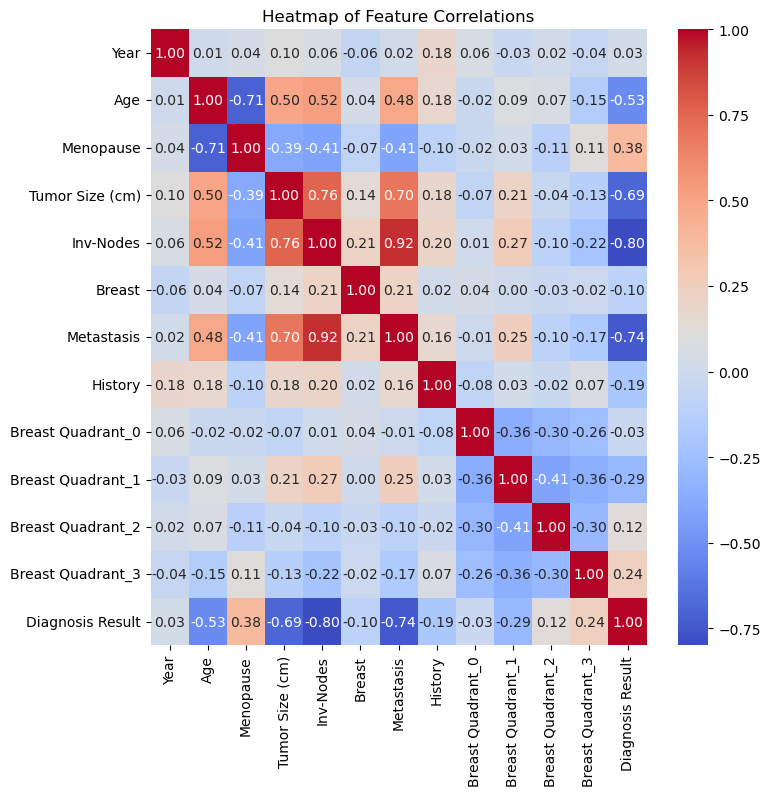

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

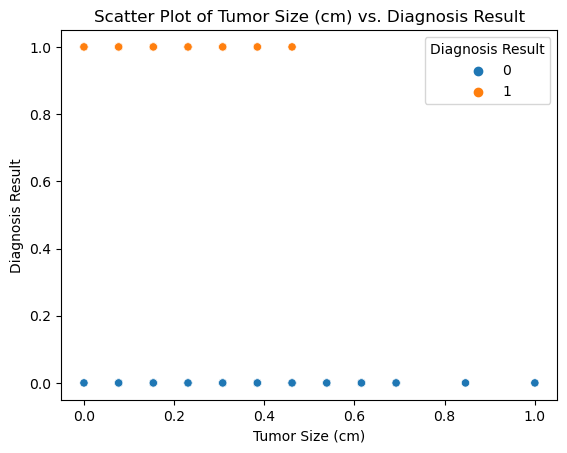

In [33]:
sns.scatterplot(data=df, x='Tumor Size (cm)', y='Diagnosis Result', hue='Diagnosis Result')
plt.title('Scatter Plot of Tumor Size (cm) vs. Diagnosis Result')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Diagnosis Result')
plt.show()

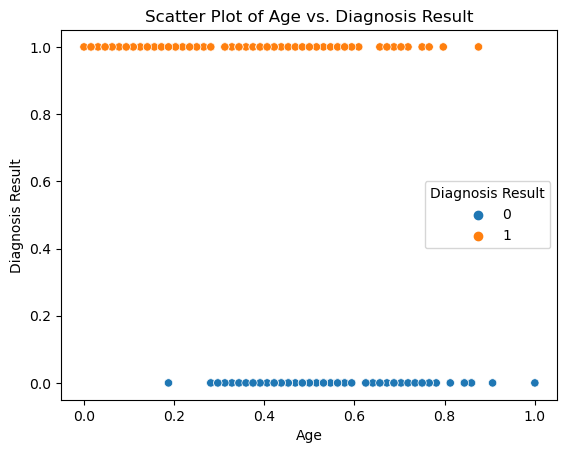

In [34]:
sns.scatterplot(data=df, x='Age', y='Diagnosis Result', hue='Diagnosis Result')
plt.title('Scatter Plot of Age vs. Diagnosis Result')
plt.xlabel('Age')
plt.ylabel('Diagnosis Result')
plt.show()

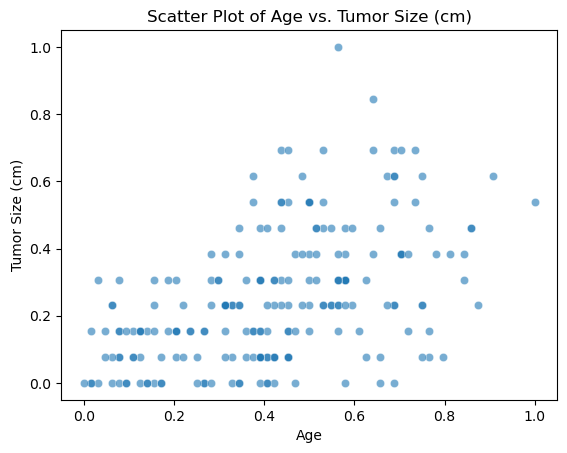

In [35]:
sns.scatterplot(data=df, x='Age', y='Tumor Size (cm)', alpha=0.6)
plt.title('Scatter Plot of Age vs. Tumor Size (cm)')
plt.xlabel('Age')
plt.ylabel('Tumor Size (cm)')
plt.show()

#Test and Train


In [36]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
print(X.shape)
print(Y.shape)

(213, 12)
(213,)


In [37]:
x_train, x_dev_test, y_train, y_dev_test = train_test_split(X, Y, train_size=0.7, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_dev_test.shape)
print(y_dev_test.shape)

x_test, x_dev, y_test, y_dev = train_test_split(x_dev_test, y_dev_test, train_size=0.5, random_state=5)
print(x_test.shape)
print(y_test.shape)
print(x_dev.shape)
print(y_dev.shape)

(149, 12)
(149,)
(64, 12)
(64,)
(32, 12)
(32,)
(32, 12)
(32,)


#**Logistic** **Regression**

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
sigmoid(0)

0.5

In [40]:
def logistic_regression(X, Y, alpha, num_iter, add_intercept):
    """
    X             -> [n_samples, n_features]
    Y             -> [n_samples, 1]     labels
    alpha         -> learning rate
    num_iter      -> number of iteration of the algorithm
    add_intercept -> (boolean) bias term
    """
    epsilon = 1e-5
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)

    m, n = X.shape
    w = np.zeros(n)
    b = 0

    for epoch in range(num_iter):
        total_cost = 0

        dw = np.zeros(n)
        db = 0

        z = np.dot(X, w) + b
        z = z.astype(float)
        a = sigmoid(z)
        total_cost = -np.sum(Y * np.log(a + epsilon) + (1 - Y) * np.log(1 - a + epsilon))
        dz = a - Y

        dw = np.dot(X.T, dz)
        db = np.sum(dz)

        total_cost /= m
        dw /= m
        db /= m

        w -= alpha * dw
        b -= alpha * db


    return w, b



In [41]:
def predict(X, w, b, add_intercept):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
    z = np.dot(X, w) + b
    z = z.astype(float)
    a = sigmoid(z)
    return (a >= 0.5).astype(int)

In [42]:
alpha = 0.01
num_iteration = 1000
add_intercept = True

# test the model on dev
w, b = logistic_regression(x_train, y_train, alpha, num_iteration, add_intercept)

y_pred = predict(x_dev, w, b, add_intercept)

precision = precision_score(y_dev, y_pred)
recall = recall_score(y_dev, y_pred)
f1 = f1_score(y_dev, y_pred)
accuracy = (y_pred == y_dev).mean()
print(f'Accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1_score: {f1:.2f}')

Accuracy: 0.88
precision: 0.82
recall: 1.00
f1_score: 0.90


w: [ 0.21953101  0.16323564 -0.28457275  0.69111598 -0.39509808 -1.02508945
  0.05525733 -0.87594129 -0.21361131  0.03396691 -0.29793535  0.17304178
  0.31045767], b: 0.21953101370540054


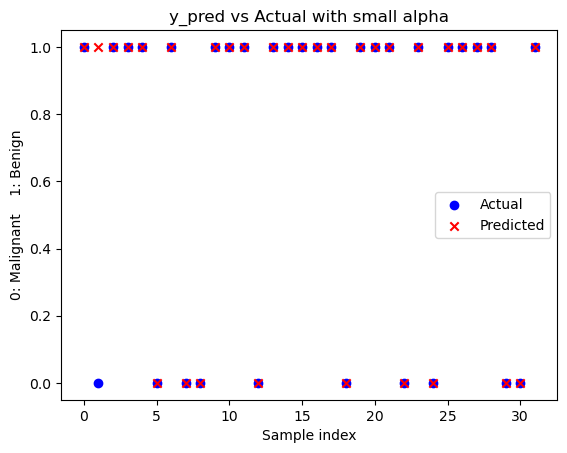

Accuracy: 0.97
precision: 0.96
recall: 1.00
f1_score: 0.98


In [43]:
alpha = 0.01
num_iteration = 1000
add_intercept = True

#test the model on test
w, b = logistic_regression(x_train, y_train, alpha, num_iteration, add_intercept)

y_pred = predict(x_test, w, b, add_intercept)
print(f"w: {w}, b: {b}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Sample index')
plt.ylabel('0: Malignant    1: Benign')
plt.title('y_pred vs Actual with small alpha')
plt.legend()
plt.show()

accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1_score: {f1:.2f}')

w: [ 12.96322483   6.69802754 -21.47586597   2.91801433 -52.02685759
 -10.88881775   6.30726538  -7.64438799  -2.05767347  -0.63626558
  -0.29909544   9.34069125   4.5578946 ], b: 12.96322482969214


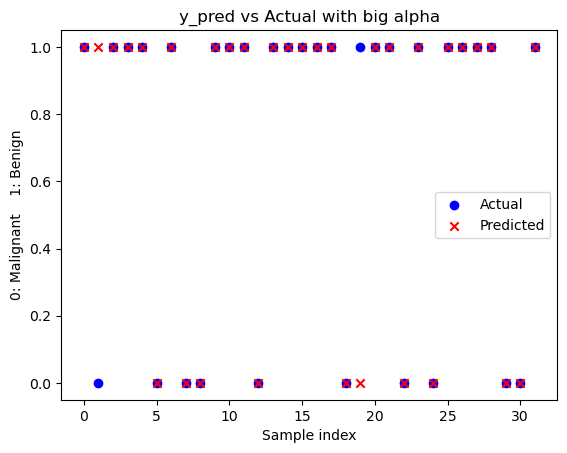

Accuracy: 0.94
precision: 0.95
recall: 0.95
f1_score: 0.95


In [44]:
alpha = 50
num_iteration = 1000
add_intercept = True

w, b = logistic_regression(x_train, y_train, alpha, num_iteration, add_intercept)

y_pred = predict(x_test, w, b, add_intercept)
print(f"w: {w}, b: {b}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Sample index')
plt.ylabel('0: Malignant    1: Benign')
plt.title('y_pred vs Actual with big alpha')
plt.legend()
plt.show()

accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1_score: {f1:.2f}')

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of a classifier. High precision indicates a low rate of false positives.

$$ \text{Precision} = \frac{TP}{TP + FP} $$

**Recall:** Recall is the ratio of correctly predicted positive observations to all actual positives. It measures the completeness of a classifier. High recall indicates a low rate of false negatives.
$$ \text{Recall} = \frac{TP}{TP + FN} $$

**F1 Score:** The F1 Score is the weighted average of Precision and Recall. Therefore, it takes into account both false positives and false negatives. A high F1 Score indicates that a classifier has a good balance between Precision and Recall.


$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$